In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [10]:
import pandas as pd
data = pd.read_csv("nearestearthobjects.csv")

In [12]:
print(data.isnull().sum())
data = data.dropna()
data = data.drop_duplicates()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


             neo_id  absolute_magnitude  estimated_diameter_min  \
count  3.381710e+05       338171.000000           338171.000000   
mean   1.760041e+07           22.932525                0.157812   
std    2.287276e+07            2.911216                0.313885   
min    2.000433e+06            9.250000                0.000511   
25%    3.373980e+06           20.740000                0.025384   
50%    3.742127e+06           22.800000                0.073207   
75%    5.405374e+07           25.100000                0.189041   
max    5.446281e+07           33.580000               37.545248   

       estimated_diameter_max  relative_velocity  miss_distance  
count           338171.000000      338171.000000   3.381710e+05  
mean                 0.352878       51060.017994   4.153547e+07  
std                  0.701869       26399.922830   2.077411e+07  
min                  0.001143         203.346433   6.745533e+03  
25%                  0.056760       30710.626399   2.494495e+07  


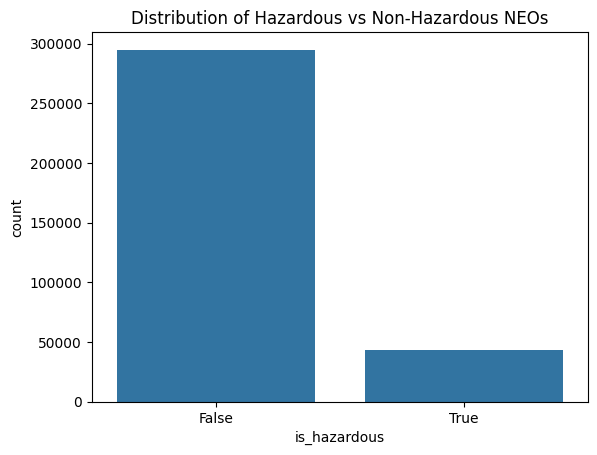

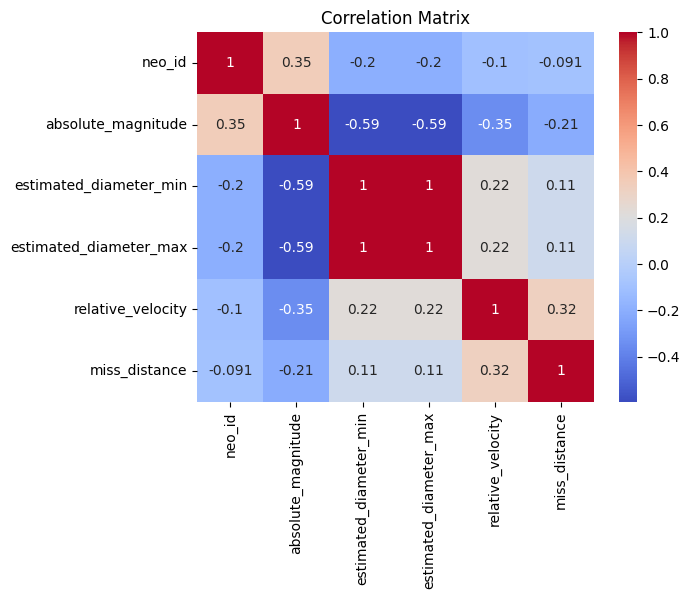

In [26]:
print(data.describe())
sns.countplot(x='is_hazardous', data=data)
plt.title('Distribution of Hazardous vs Non-Hazardous NEOs')
plt.show()
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
corr = data[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
X = data.drop(['is_hazardous', 'neo_id', 'name', 'orbiting_body'], axis=1)
y = data['is_hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_smote)
y_pred = model.predict(X_test_scaled)

              precision    recall  f1-score   support

       False       0.95      0.95      0.95     59088
        True       0.67      0.65      0.66      8547

    accuracy                           0.92     67635
   macro avg       0.81      0.80      0.81     67635
weighted avg       0.91      0.92      0.91     67635



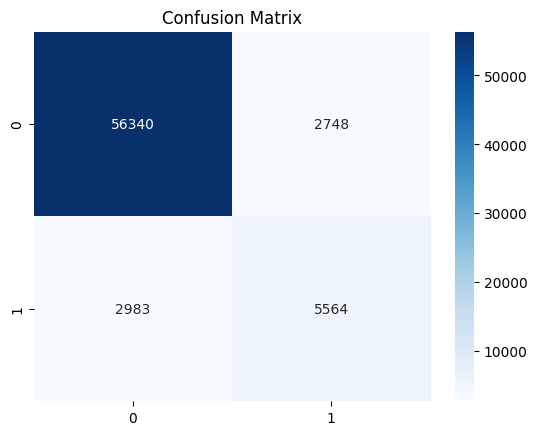

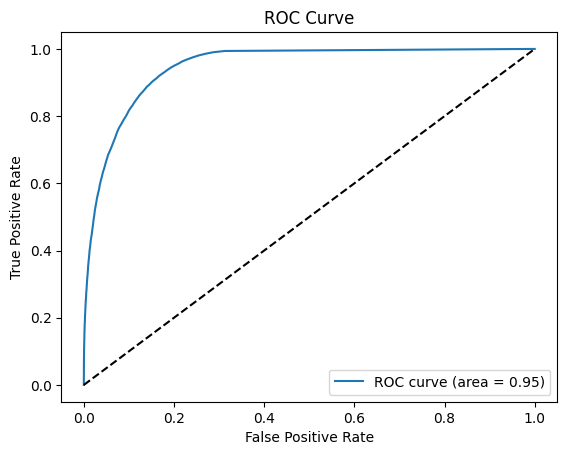

In [42]:
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()